In [1]:
import pandas as pd
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
import numpy as np
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Connects to Mercury
# Selects booking requests data, where the delivery date is between 10th and 15th of February 2020
# Booking requests when order changes - look what fields are important

connection = pymysql.connect(host = 'localhost',
                            user = 'devs_readonly',
                            password = 'cvspOze7ti9lXN0NbpDPL8dxxuSV2bILp58v5swx',
                            db = 'hg_prod',
                            port = 3306
                            )

with connection.cursor() as cursor:
    sql = 'SELECT * FROM job_updates'
    cursor.execute(sql)
    result = cursor.fetchall()
    colnames = [desc[0] for desc in cursor.description]

df = pd.DataFrame(result, columns = colnames)    


In [3]:
df

,update_id,id,booking_id,courier_own_equipment,current_lat,current_lng,current_state,date_arrived_at_dropoff,date_arrived_at_pickup,date_assigned,date_completed,date_created,date_dropped_off,date_enroute_to_dropoff,date_enroute_to_pickup,date_picked_up,delivery_provider,driver_name,driver_phone,dropoff_lat,dropoff_lng,dropoff_tracking_url,dropoff_window_end,dropoff_window_start,eta_dropoff,eta_dropoff_best_guess,eta_dropoff_optimistic,eta_dropoff_pessimistic,eta_pickup,last_tracking_update,last_updated,order_human_id,partner_id,pickup_lat,pickup_lng,pickup_tracking_url,pickup_window_end,pickup_window_start,raw_response,status,tracking_source,vehicle_type,webhook_client_ip,webhook_timestamp
0,1,135830,137311.0,None,NaN,NaN,deleted,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,None,None,None,NaN,NaN,None,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-09-07 13:38:10,2020-09-07 13:38:11,291266.0,None,NaN,NaN,None,NaT,NaT,"{""JobId"":227511,""QuoteId"":755274,""ClientId"":71...",None,None,None,52.16.158.243,2020-09-07 12:38:11
1,2,136539,138006.0,true,NaN,NaN,pending,NaT,NaT,NaT,NaT,2020-09-07 13:38:20,NaT,NaT,NaT,NaT,GENIITRANSPORT,None,None,51.498089,-0.13654,None,NaT,NaT,2020-09-08 11:35:00,NaT,NaT,NaT,2020-09-08 10:01:00,2020-09-07 13:38:20,1970-01-01 00:00:00,291266.0,228383,51.532959,-0.05942,None,2020-09-08 10:01:00,2020-09-08 10:01:00,"{""JobId"":228383,""QuoteId"":760002,""ClientId"":71...",None,lineten,MOTORBIKE,108.128.210.204,2020-09-07 12:38:21
2,3,136539,138006.0,None,NaN,NaN,None,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,None,None,None,NaN,NaN,None,2020-09-08 11:30:00,2020-09-08 11:00:00,NaT,NaT,NaT,NaT,NaT,NaT,2020-09-07 13:38:23,291266.0,None,NaN,NaN,None,NaT,NaT,None,booked,None,None,None,NaT
3,4,136540,138007.0,false,NaN,NaN,pending,NaT,NaT,NaT,NaT,2020-09-07 13:39:20,NaT,NaT,NaT,NaT,GENIITRANSPORT,None,None,51.508652,-0.13310,None,NaT,NaT,2020-09-08 12:04:00,NaT,NaT,NaT,2020-09-08 11:10:00,2020-09-07 13:39:20,1970-01-01 00:00:00,291816.0,228384,51.520050,-0.14252,None,2020-09-08 11:10:00,2020-09-08 11:10:00,"{""JobId"":228384,""QuoteId"":760003,""ClientId"":71...",None,lineten,CAR,108.128.210.204,2020-09-07 12:39:21
4,5,136540,138007.0,None,NaN,NaN,None,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,None,None,None,NaN,NaN,None,2020-09-08 12:00:00,2020-09-08 11:30:00,NaT,NaT,NaT,NaT,NaT,NaT,2020-09-07 13:39:24,291816.0,None,NaN,NaN,None,NaT,NaT,None,booked,None,None,None,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391582,391583,143366,144921.0,false,51.520786,-0.195640,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.531811,-0.13607,https://tinyurl.com/y4onhw22,NaT,NaT,2020-10-28 08:56:00,NaT,NaT,NaT,2020-10-28 08:24:00,2020-10-28 08:03:20,2020-10-28 08:03:21,297930.0,236629,51.521252,-0.15220,https://tinyurl.com/y3ywec9y,2020-10-28 08:28:00,2020-10-28 08:28:00,"{""JobId"":236629,""QuoteId"":812277,""ClientId"":71...",None,lineten,CAR,52.16.158.243,2020-10-28 08:03:21
391583,391584,143366,144921.0,false,51.519604,-0.185783,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.531811,-0.13607,https://tinyurl.com/y4onhw22,NaT,NaT,2020-10-28 08:53:00,NaT,NaT,NaT,2020-10-28 08:21:00,2020-10-28 08:04:21,2020-10-28 08:04:21,297930.0,236629,51.521252,-0.15220,https://tinyurl.com/y3ywec9y,2020-10-28 08:28:00,2020-10-28 08:28:00,"{""JobId"":236629,""QuoteId"":812277,""ClientId"":71...",None,lineten,CAR,52.16.158.243,2020-10-28 08:04:21
391584,391585,143366,144921.0,false,51.519676,-0.183896,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.531811,-0.13607,https://tinyurl.com/y4onhw22,NaT,NaT,2020-10-28 08:55:00,NaT,NaT,NaT,2020-10-28 08:23:00,2020-10-28 08:05:21,2020-10-28 08:05:21,297930.0,236629,51.521252,-0.15220,https://tinyurl.com/y3ywec9y,2020-10-28 08:28:00,2020-10-28 08:28:00,"{""JobId"":236629,""QuoteId"

In [4]:
df2 = df[df['update_id']>= 329821].reset_index()
df2

,index,update_id,id,booking_id,courier_own_equipment,current_lat,current_lng,current_state,date_arrived_at_dropoff,date_arrived_at_pickup,date_assigned,date_completed,date_created,date_dropped_off,date_enroute_to_dropoff,date_enroute_to_pickup,date_picked_up,delivery_provider,driver_name,driver_phone,dropoff_lat,dropoff_lng,dropoff_tracking_url,dropoff_window_end,dropoff_window_start,eta_dropoff,eta_dropoff_best_guess,eta_dropoff_optimistic,eta_dropoff_pessimistic,eta_pickup,last_tracking_update,last_updated,order_human_id,partner_id,pickup_lat,pickup_lng,pickup_tracking_url,pickup_window_end,pickup_window_start,raw_response,status,tracking_source,vehicle_type,webhook_client_ip,webhook_timestamp
0,329820,329821,142515,144046.0,true,NaN,NaN,deleted,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,None,None,51.515930,-0.14060,None,NaT,NaT,2020-10-21 12:04:00,NaT,NaT,NaT,2020-10-21 11:08:00,2020-10-21 02:25:10,2020-10-21 02:25:11,296400.0,235621,51.510849,-0.13703,None,NaT,NaT,"{""JobId"":235621,""QuoteId"":805492,""ClientId"":71...",None,lineten,LARGEMOTORBIKE,52.16.158.243,2020-10-21 01:25:11
1,329821,329822,142686,NaN,false,NaN,NaN,pending,NaT,NaT,NaT,NaT,2020-10-21 02:25:21,NaT,NaT,NaT,NaT,ADDISONLEE,None,None,51.515930,-0.14060,None,NaT,NaT,2020-10-21 11:39:00,NaT,NaT,NaT,2020-10-21 11:08:00,2020-10-21 02:25:21,1970-01-01 00:00:00,296400.0,235819,51.510849,-0.13703,None,2020-10-21 11:08:00,2020-10-21 11:08:00,"{""JobId"":235819,""QuoteId"":806682,""ClientId"":71...",None,lineten,CAR,52.16.158.243,2020-10-21 01:25:22
2,329822,329823,142686,144216.0,None,NaN,NaN,None,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,None,None,None,NaN,NaN,None,2020-10-21 12:00:00,2020-10-21 11:30:00,NaT,NaT,NaT,NaT,NaT,NaT,2020-10-21 02:25:26,296400.0,235819,NaN,NaN,None,2020-10-21 11:08:00,2020-10-21 11:08:00,None,booked,lineten,CAR,None,NaT
3,329823,329824,142386,143909.0,true,NaN,NaN,assigned,NaT,NaT,2020-10-21 05:09:19,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,07864858447,51.515930,-0.14060,https://tinyurl.com/y2abc6al,NaT,NaT,2020-10-21 06:33:00,NaT,NaT,NaT,2020-10-21 06:15:00,2020-10-21 05:09:19,2020-10-21 05:09:21,296383.0,235498,51.507549,-0.14564,https://tinyurl.com/yykkj3av,2020-10-21 06:15:00,2020-10-21 06:15:00,"{""JobId"":235498,""QuoteId"":804539,""ClientId"":71...",None,lineten,LARGEMOTORBIKE,52.16.158.243,2020-10-21 04:09:21
4,329824,329825,142664,144194.0,false,NaN,NaN,assigned,NaT,NaT,2020-10-21 05:09:21,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,07864858447,51.521240,-0.08749,https://tinyurl.com/yyhmv4r2,NaT,NaT,2020-10-21 08:25:00,NaT,NaT,NaT,2020-10-21 08:05:00,2020-10-21 05:09:21,2020-10-21 05:09:21,295484.0,235792,51.511978,-0.08250,https://tinyurl.com/y44eb9ty,2020-10-21 08:05:00,2020-10-21 08:05:00,"{""JobId"":235792,""QuoteId"":806545,""ClientId"":71...",None,lineten,CAR,52.16.158.243,2020-10-21 04:09:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61762,391582,391583,143366,144921.0,false,51.520786,-0.195640,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.531811,-0.13607,https://tinyurl.com/y4onhw22,NaT,NaT,2020-10-28 08:56:00,NaT,NaT,NaT,2020-10-28 08:24:00,2020-10-28 08:03:20,2020-10-28 08:03:21,297930.0,236629,51.521252,-0.15220,https://tinyurl.com/y3ywec9y,2020-10-28 08:28:00,2020-10-28 08:28:00,"{""JobId"":236629,""QuoteId"":812277,""ClientId"":71...",None,lineten,CAR,52.16.158.243,2020-10-28 08:03:21
61763,391583,391584,143366,144921.0,false,51.519604,-0.185783,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.531811,-0.13607,https://tinyurl.com/y4onhw22,NaT,NaT,2020-10-28 08:53:00,NaT,NaT,NaT,2020-10-28 08:21:00,2020-10-28 08:04:21,2020-10-28 08:04:21,297930.0,236629,51.521252,-0.15220,https://tinyurl.com/y3ywec9y,2020-10-28 08:28:00,2020-10-28 08:28:00,"{""JobId"":236629,""QuoteId"":812277

In [5]:
df3 = df2[(~df2['current_lat'].isna()) & (~df2['current_lng'].isna())].reset_index(drop=True)
df3 = df3.drop(['index'], axis=1)
df3

,update_id,id,booking_id,courier_own_equipment,current_lat,current_lng,current_state,date_arrived_at_dropoff,date_arrived_at_pickup,date_assigned,date_completed,date_created,date_dropped_off,date_enroute_to_dropoff,date_enroute_to_pickup,date_picked_up,delivery_provider,driver_name,driver_phone,dropoff_lat,dropoff_lng,dropoff_tracking_url,dropoff_window_end,dropoff_window_start,eta_dropoff,eta_dropoff_best_guess,eta_dropoff_optimistic,eta_dropoff_pessimistic,eta_pickup,last_tracking_update,last_updated,order_human_id,partner_id,pickup_lat,pickup_lng,pickup_tracking_url,pickup_window_end,pickup_window_start,raw_response,status,tracking_source,vehicle_type,webhook_client_ip,webhook_timestamp
0,329826,142386,143909.0,true,51.626595,-0.521982,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-10-21 05:10:20,NaT,GENIITRANSPORT,Emil Rutyna,None,51.515930,-0.14060,https://tinyurl.com/y2abc6al,NaT,NaT,2020-10-21 06:25:00,NaT,NaT,NaT,2020-10-21 06:04:00,2020-10-21 05:10:20,2020-10-21 05:10:21,296383.0,235498,51.507549,-0.14564,https://tinyurl.com/yykkj3av,2020-10-21 06:15:00,2020-10-21 06:15:00,"{""JobId"":235498,""QuoteId"":804539,""ClientId"":71...",None,lineten,LARGEMOTORBIKE,52.210.216.161,2020-10-21 04:10:21
1,329827,142386,143909.0,true,51.614101,-0.526375,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.515930,-0.14060,https://tinyurl.com/y2abc6al,NaT,NaT,2020-10-21 06:30:00,NaT,NaT,NaT,2020-10-21 06:10:00,2020-10-21 05:11:21,2020-10-21 05:11:22,296383.0,235498,51.507549,-0.14564,https://tinyurl.com/yykkj3av,2020-10-21 06:15:00,2020-10-21 06:15:00,"{""JobId"":235498,""QuoteId"":804539,""ClientId"":71...",None,lineten,LARGEMOTORBIKE,52.16.158.243,2020-10-21 04:11:22
2,329828,142386,143909.0,true,51.601578,-0.529788,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.515930,-0.14060,https://tinyurl.com/y2abc6al,NaT,NaT,2020-10-21 06:30:00,NaT,NaT,NaT,2020-10-21 06:10:00,2020-10-21 05:12:21,2020-10-21 05:12:22,296383.0,235498,51.507549,-0.14564,https://tinyurl.com/yykkj3av,2020-10-21 06:15:00,2020-10-21 06:15:00,"{""JobId"":235498,""QuoteId"":804539,""ClientId"":71...",None,lineten,LARGEMOTORBIKE,52.16.158.243,2020-10-21 04:12:22
3,329829,142386,143909.0,true,51.588795,-0.533328,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.515930,-0.14060,https://tinyurl.com/y2abc6al,NaT,NaT,2020-10-21 06:30:00,NaT,NaT,NaT,2020-10-21 06:10:00,2020-10-21 05:13:21,2020-10-21 05:13:22,296383.0,235498,51.507549,-0.14564,https://tinyurl.com/yykkj3av,2020-10-21 06:15:00,2020-10-21 06:15:00,"{""JobId"":235498,""QuoteId"":804539,""ClientId"":71...",None,lineten,LARGEMOTORBIKE,52.16.158.243,2020-10-21 04:13:22
4,329830,142386,143909.0,true,51.575554,-0.535653,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.515930,-0.14060,https://tinyurl.com/y2abc6al,NaT,NaT,2020-10-21 06:30:00,NaT,NaT,NaT,2020-10-21 06:10:00,2020-10-21 05:14:20,2020-10-21 05:14:21,296383.0,235498,51.507549,-0.14564,https://tinyurl.com/yykkj3av,2020-10-21 06:15:00,2020-10-21 06:15:00,"{""JobId"":235498,""QuoteId"":804539,""ClientId"":71...",None,lineten,LARGEMOTORBIKE,52.210.216.161,2020-10-21 04:14:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58745,391583,143366,144921.0,false,51.520786,-0.195640,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.531811,-0.13607,https://tinyurl.com/y4onhw22,NaT,NaT,2020-10-28 08:56:00,NaT,NaT,NaT,2020-10-28 08:24:00,2020-10-28 08:03:20,2020-10-28 08:03:21,297930.0,236629,51.521252,-0.15220,https://tinyurl.com/y3ywec9y,2020-10-28 08:28:00,2020-10-28 08:28:00,"{""JobId"":236629,""QuoteId"":812277,""ClientId"":71...",None,lineten,CAR,52.16.158.243,2020-10-28 08:03:21
58746,391584,143366,144921.0,false,51.519604,-0.185783,enrout

In [6]:
lats = list(df3['current_lat'])
longs = list(df3['current_lng'])

coordinates = []

for i in range(len(lats)):
    
    c = [lats[i], longs[i]]
    
    coordinates.append(c)
    
df3['coordinates'] = coordinates
df3

,update_id,id,booking_id,courier_own_equipment,current_lat,current_lng,current_state,date_arrived_at_dropoff,date_arrived_at_pickup,date_assigned,date_completed,date_created,date_dropped_off,date_enroute_to_dropoff,date_enroute_to_pickup,date_picked_up,delivery_provider,driver_name,driver_phone,dropoff_lat,dropoff_lng,dropoff_tracking_url,dropoff_window_end,dropoff_window_start,eta_dropoff,eta_dropoff_best_guess,eta_dropoff_optimistic,eta_dropoff_pessimistic,eta_pickup,last_tracking_update,last_updated,order_human_id,partner_id,pickup_lat,pickup_lng,pickup_tracking_url,pickup_window_end,pickup_window_start,raw_response,status,tracking_source,vehicle_type,webhook_client_ip,webhook_timestamp,coordinates
0,329826,142386,143909.0,true,51.626595,-0.521982,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-10-21 05:10:20,NaT,GENIITRANSPORT,Emil Rutyna,None,51.515930,-0.14060,https://tinyurl.com/y2abc6al,NaT,NaT,2020-10-21 06:25:00,NaT,NaT,NaT,2020-10-21 06:04:00,2020-10-21 05:10:20,2020-10-21 05:10:21,296383.0,235498,51.507549,-0.14564,https://tinyurl.com/yykkj3av,2020-10-21 06:15:00,2020-10-21 06:15:00,"{""JobId"":235498,""QuoteId"":804539,""ClientId"":71...",None,lineten,LARGEMOTORBIKE,52.210.216.161,2020-10-21 04:10:21,"[51.626595, -0.521982]"
1,329827,142386,143909.0,true,51.614101,-0.526375,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.515930,-0.14060,https://tinyurl.com/y2abc6al,NaT,NaT,2020-10-21 06:30:00,NaT,NaT,NaT,2020-10-21 06:10:00,2020-10-21 05:11:21,2020-10-21 05:11:22,296383.0,235498,51.507549,-0.14564,https://tinyurl.com/yykkj3av,2020-10-21 06:15:00,2020-10-21 06:15:00,"{""JobId"":235498,""QuoteId"":804539,""ClientId"":71...",None,lineten,LARGEMOTORBIKE,52.16.158.243,2020-10-21 04:11:22,"[51.614101, -0.526375]"
2,329828,142386,143909.0,true,51.601578,-0.529788,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.515930,-0.14060,https://tinyurl.com/y2abc6al,NaT,NaT,2020-10-21 06:30:00,NaT,NaT,NaT,2020-10-21 06:10:00,2020-10-21 05:12:21,2020-10-21 05:12:22,296383.0,235498,51.507549,-0.14564,https://tinyurl.com/yykkj3av,2020-10-21 06:15:00,2020-10-21 06:15:00,"{""JobId"":235498,""QuoteId"":804539,""ClientId"":71...",None,lineten,LARGEMOTORBIKE,52.16.158.243,2020-10-21 04:12:22,"[51.601578, -0.529788]"
3,329829,142386,143909.0,true,51.588795,-0.533328,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.515930,-0.14060,https://tinyurl.com/y2abc6al,NaT,NaT,2020-10-21 06:30:00,NaT,NaT,NaT,2020-10-21 06:10:00,2020-10-21 05:13:21,2020-10-21 05:13:22,296383.0,235498,51.507549,-0.14564,https://tinyurl.com/yykkj3av,2020-10-21 06:15:00,2020-10-21 06:15:00,"{""JobId"":235498,""QuoteId"":804539,""ClientId"":71...",None,lineten,LARGEMOTORBIKE,52.16.158.243,2020-10-21 04:13:22,"[51.588795, -0.533328]"
4,329830,142386,143909.0,true,51.575554,-0.535653,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.515930,-0.14060,https://tinyurl.com/y2abc6al,NaT,NaT,2020-10-21 06:30:00,NaT,NaT,NaT,2020-10-21 06:10:00,2020-10-21 05:14:20,2020-10-21 05:14:21,296383.0,235498,51.507549,-0.14564,https://tinyurl.com/yykkj3av,2020-10-21 06:15:00,2020-10-21 06:15:00,"{""JobId"":235498,""QuoteId"":804539,""ClientId"":71...",None,lineten,LARGEMOTORBIKE,52.210.216.161,2020-10-21 04:14:21,"[51.575554, -0.535653]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58745,391583,143366,144921.0,false,51.520786,-0.195640,enroute-to-pickup,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,GENIITRANSPORT,Emil Rutyna,None,51.531811,-0.13607,https://tinyurl.com/y4onhw22,NaT,NaT,2020-10-28 08:56:00,NaT,NaT,NaT,2020-10-28 08:24:00,2020-10-28 08:03:20,2020-10-28 08:03:21,297930.0,236629,51.521252,-0.15220,https://tinyurl.com/y3ywec9y,2020-10-28 08:28:00,2020-10-28 08:28:00,"{""JobId"":236629,""QuoteId"

In [31]:
def gps_freq(status, x):
    
    df4 = df3[df3['current_state'].isin(status)]
    
    df4 = df4.groupby(['id', 'delivery_provider'])['coordinates', 'webhook_timestamp'].agg(lambda x: list(x)).reset_index()
    
    coordinates2 = list(df4['coordinates'])
    webhooks = list(df4['webhook_timestamp'])

    coordinates3 = []
    webhooks2 = []


    for i in coordinates2:
    
        coordinates3.append(i[::-1])
    
    for i in webhooks:
    
        webhooks2.append(i[::-1])

    df4['coordinates'] = coordinates3
    df4['webhook_timestamp'] = webhooks2
    
    
    repeats = []

    for i in coordinates3:
    
        lst = []
    
        for z in range(len(i)-1):
        
            if i[z][0] == i[z+1][0] and i[z][1] == i[z+1][1]:
            
                lst.append(z)
    
        repeats.append(lst)

    df4['repeats'] = repeats
    
    
    webhooks3 = []

    for i in range(len(webhooks2)):
    
        lst2 = []
    
        for z in range(len(webhooks2[i])):
        
            if z not in repeats[i]:
            
                lst2.append(webhooks2[i][z])
    
        webhooks3.append(lst2)
    

    df4['unique_gps_webhooks'] = webhooks3
    
    
    deltas = []


    for i in webhooks3:
    
        lst3 = []
    
        for z in range(len(i)-1):
        
            lst3.append((i[z] - i[z+1]).total_seconds())
    
        deltas.append(lst3)
    
    df4['deltas'] = deltas

    
    df5 = df4.groupby(['delivery_provider'])['deltas'].apply(list).reset_index()
    deltas2 = df5['deltas']

    deltas3 = []

    for i in deltas2:
        
        lst4 = []
        
        for z in i:
        
            for x in z:
        
                lst4.append(x)
        deltas3.append(lst4)
        
    df5['delta_seconds'] = deltas3
    
    ads = list(df5['delta_seconds'][0])
    cds = list(df5['delta_seconds'][1])
    dds = list(df5['delta_seconds'][2])
    gds = list(df5['delta_seconds'][3])
    sds = list(df5['delta_seconds'][4])

    adf=pd.DataFrame(ads)
    adf.columns=['delta_seconds']
    adf['delivery_provider'] = 'ADDISONLEE'

    cdf=pd.DataFrame(cds)
    cdf.columns=['delta_seconds']
    cdf['delivery_provider'] = 'CRAWFORDS'

    ddf=pd.DataFrame(dds)
    ddf.columns=['delta_seconds']
    ddf['delivery_provider'] = 'DELIVERYMATES'

    gdf=pd.DataFrame(gds)
    gdf.columns=['delta_seconds']
    gdf['delivery_provider'] = 'GENIITRANSPORT'

    sdf=pd.DataFrame(sds)
    sdf.columns=['delta_seconds']
    sdf['delivery_provider'] = 'STUART'


    final_df = pd.concat([adf,cdf,ddf,gdf,sdf])
    
    if x == 'yes':
        final_df = final_df[(final_df['delta_seconds']<70) & (final_df['delta_seconds']>0)]
    
    return final_df


In [36]:
all_status = gps_freq(list(set(df2['current_state'])), 'no')

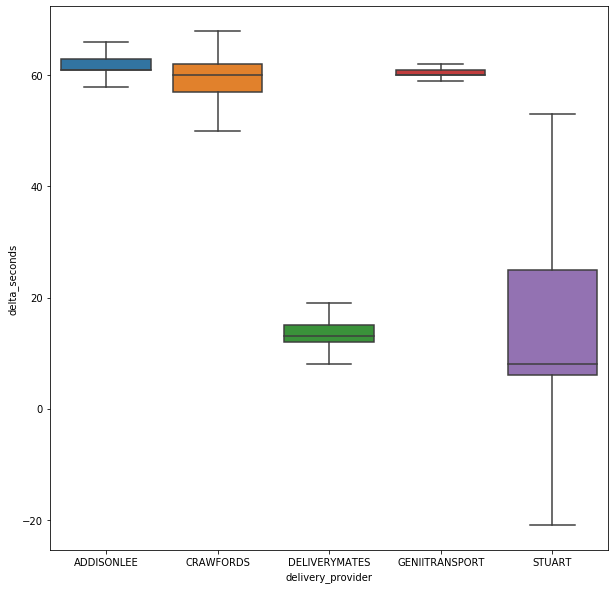

In [44]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1 = sns.boxplot(x=all_status['delivery_provider'], y=all_status['delta_seconds'], showfliers=False)

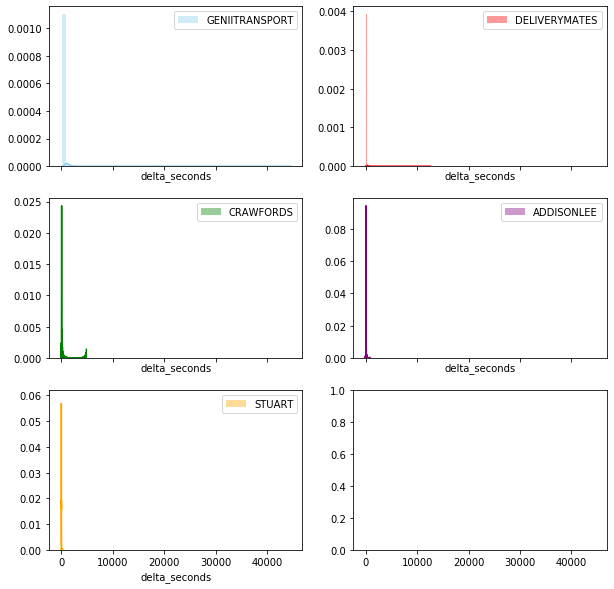

In [45]:
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=True)
genii = all_status[all_status['delivery_provider']=='GENIITRANSPORT']
deliverymates = all_status[all_status['delivery_provider']=='DELIVERYMATES']
crawfords = all_status[all_status['delivery_provider']=='CRAWFORDS']
addison = all_status[all_status['delivery_provider']=='ADDISONLEE']
stuart = all_status[all_status['delivery_provider']=='STUART']
ax1=sns.distplot(genii['delta_seconds'] , color="skyblue", label="GENIITRANSPORT", ax=axes[0, 0])
ax2=sns.distplot(deliverymates['delta_seconds'] , color="red", label="DELIVERYMATES", ax=axes[0, 1])
ax3=sns.distplot(crawfords['delta_seconds'] , color="green", label="CRAWFORDS", ax=axes[1, 0])
ax4=sns.distplot(addison['delta_seconds'] , color="purple", label="ADDISONLEE", ax=axes[1, 1])
ax5=sns.distplot(stuart['delta_seconds'] , color="orange", label="STUART", ax=axes[2, 0])
ax1 = ax1.legend()
ax2 = ax2.legend()
ax3 = ax3.legend()
ax4 = ax4.legend()
ax5 = ax5.legend()

In [46]:
enroute_to_pickup = gps_freq(['enroute-to-pickup'], 'no')

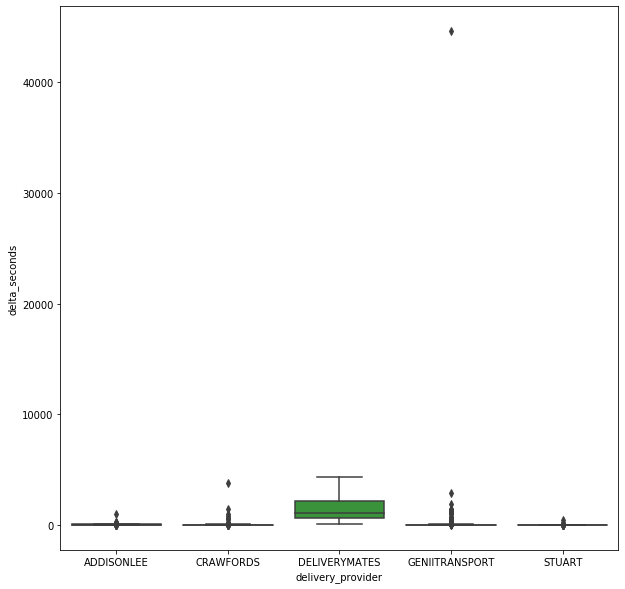

In [47]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1 = sns.boxplot(x=enroute_to_pickup['delivery_provider'], y=enroute_to_pickup['delta_seconds'])

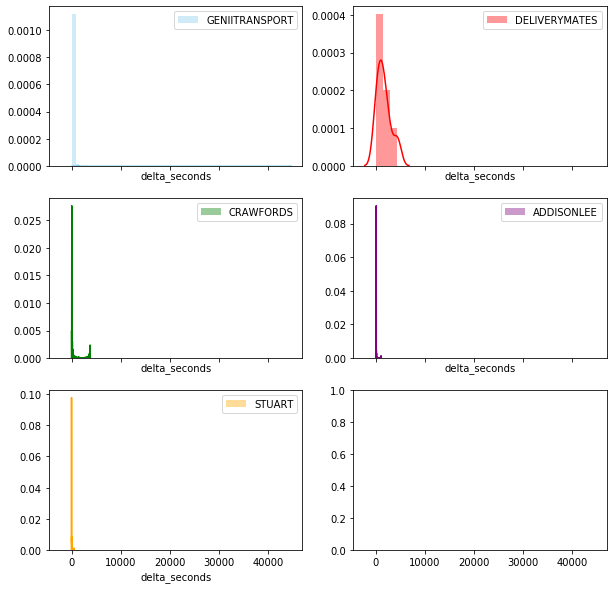

In [48]:
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=True)
genii = enroute_to_pickup[enroute_to_pickup['delivery_provider']=='GENIITRANSPORT']
deliverymates = enroute_to_pickup[enroute_to_pickup['delivery_provider']=='DELIVERYMATES']
crawfords = enroute_to_pickup[enroute_to_pickup['delivery_provider']=='CRAWFORDS']
addison = enroute_to_pickup[enroute_to_pickup['delivery_provider']=='ADDISONLEE']
stuart = enroute_to_pickup[enroute_to_pickup['delivery_provider']=='STUART']
ax1=sns.distplot(genii['delta_seconds'] , color="skyblue", label="GENIITRANSPORT", ax=axes[0, 0])
ax2=sns.distplot(deliverymates['delta_seconds'] , color="red", label="DELIVERYMATES", ax=axes[0, 1])
ax3=sns.distplot(crawfords['delta_seconds'] , color="green", label="CRAWFORDS", ax=axes[1, 0])
ax4=sns.distplot(addison['delta_seconds'] , color="purple", label="ADDISONLEE", ax=axes[1, 1])
ax5=sns.distplot(stuart['delta_seconds'] , color="orange", label="STUART", ax=axes[2, 0])
ax1 = ax1.legend()
ax2 = ax2.legend()
ax3 = ax3.legend()
ax4 = ax4.legend()
ax5 = ax5.legend()

In [50]:
at_pickup = gps_freq(['at-pickup'], 'no')

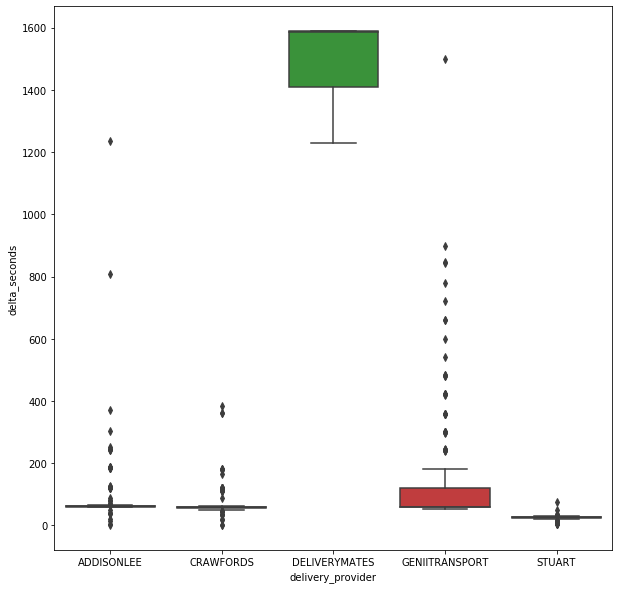

In [51]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1 = sns.boxplot(x=at_pickup['delivery_provider'], y=at_pickup['delta_seconds'])

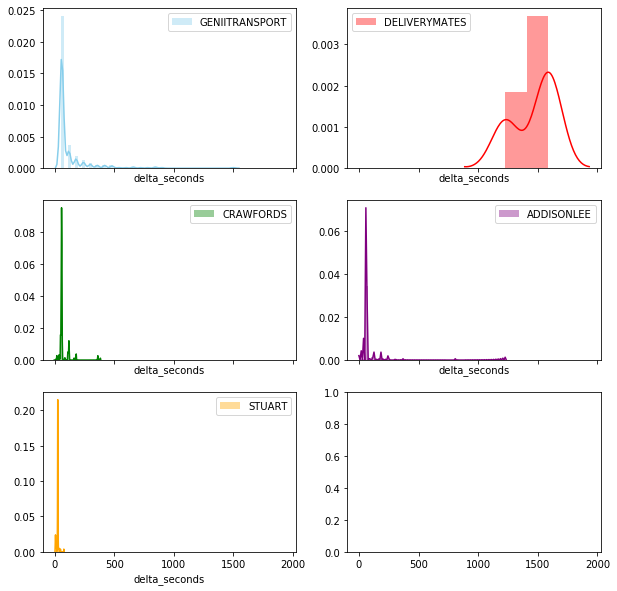

In [52]:
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=True)
genii = at_pickup[at_pickup['delivery_provider']=='GENIITRANSPORT']
deliverymates = at_pickup[at_pickup['delivery_provider']=='DELIVERYMATES']
crawfords = at_pickup[at_pickup['delivery_provider']=='CRAWFORDS']
addison = at_pickup[at_pickup['delivery_provider']=='ADDISONLEE']
stuart = at_pickup[at_pickup['delivery_provider']=='STUART']
ax1=sns.distplot(genii['delta_seconds'] , color="skyblue", label="GENIITRANSPORT", ax=axes[0, 0])
ax2=sns.distplot(deliverymates['delta_seconds'] , color="red", label="DELIVERYMATES", ax=axes[0, 1])
ax3=sns.distplot(crawfords['delta_seconds'] , color="green", label="CRAWFORDS", ax=axes[1, 0])
ax4=sns.distplot(addison['delta_seconds'] , color="purple", label="ADDISONLEE", ax=axes[1, 1])
ax5=sns.distplot(stuart['delta_seconds'] , color="orange", label="STUART", ax=axes[2, 0])
ax1 = ax1.legend()
ax2 = ax2.legend()
ax3 = ax3.legend()
ax4 = ax4.legend()
ax5 = ax5.legend()

In [53]:
enroute_to_dropoff = gps_freq(['enroute-to-dropoff'], 'no')

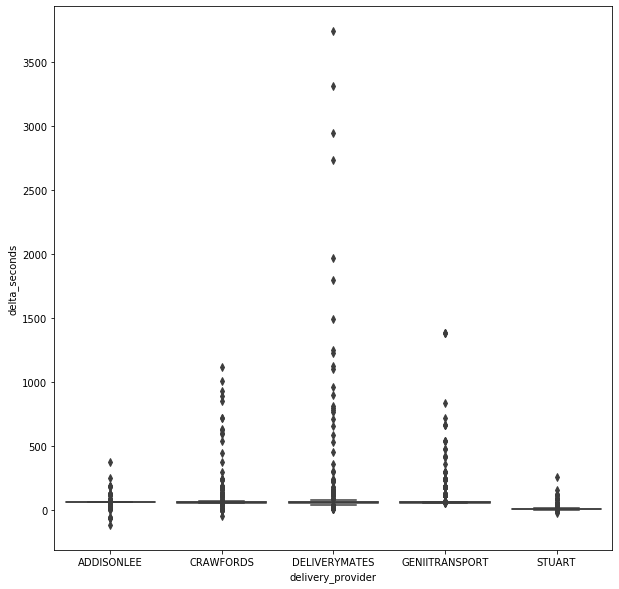

In [54]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1 = sns.boxplot(x=enroute_to_dropoff['delivery_provider'], y=enroute_to_dropoff['delta_seconds'])